In [41]:
# importing common libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# warnings
import warnings
warnings.filterwarnings('ignore')

In [42]:
# load dataset
dataset = pd.read_csv('MalariaAfricaDataset.csv')
df = pd.DataFrame(dataset)
df.head(10)

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
5,Burundi,2007,BDI,222.92,1101644.0,NaN,NaN,NaN,NaN,NaN,...,5.82,54.73,51.39,85.24,45.91,46.26,42.78,-3.373056,29.918886,POINT (-3.373056 29.918886)
6,Cabo Verde,2007,CPV,0.15,18.0,NaN,NaN,NaN,NaN,NaN,...,2.66,81.39,71.02,88.48,54.85,38.90,65.77,16.002082,-24.013197,POINT (16.002082 -24.013197)
7,Cameroon,2007,CMR,386.68,0.0,NaN,NaN,NaN,NaN,NaN,...,3.96,60.09,38.85,81.55,39.25,23.01,55.66,7.369722,12.354722,POINT (7.369722 12.354722)
8,Central African Republic,2007,CAF,471.11,0.0,NaN,NaN,NaN,NaN,NaN,...,2.30,51.10,38.18,71.87,20.55,8.76,39.50,6.611111,20.939444,POINT (6.611111 20.939444)
9,Chad,2007,TCD,210.71,48288.0,NaN,NaN,NaN,NaN,NaN,...,3.55,40.34,30.88,74.12,11.15,5.75,30.45,15.454166,18.732207,POINT (15.454166 18.732207)


In [43]:
# number of rows and columns
number_of_columns = df.shape[1]
number_of_rows = df.shape[0]
print(f'Number of columns: {number_of_columns}')
print(f'Number of rows: {number_of_rows}')

Number of columns: 27
Number of rows: 594


In [44]:
# Column names
df.columns

Index(['Country Name', 'Year', 'Country Code',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported',
       'Use of insecticide-treated bed nets (% of under-5 population)',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'People using safely managed drinking water services (% of population)',
       'People using safely managed drinking water services, rural (% of rural population)',
       'People using safely managed drinking water services, urban (% of urban population)',
       'People using safely managed sanitation services (% of population)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'People using safely managed sanitation services, urban  (% of urban population)',
       'Rural population (% of total population)',
       'Rural popula

In [45]:
# column datatypes
df.dtypes

Country Name                                                                                object
Year                                                                                         int64
Country Code                                                                                object
Incidence of malaria (per 1,000 population at risk)                                        float64
Malaria cases reported                                                                     float64
Use of insecticide-treated bed nets (% of under-5 population)                              float64
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    float64
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      float64
People using safely managed drinking water services (% of population)                      float64
People using safely managed drinking water services, rural (% of rural population)         float64
People usi

In [46]:
# Converting year datatype to datetime
df['Year'] = pd.to_datetime(df.Year,format='%Y').dt.year
df.dtypes

Country Name                                                                                object
Year                                                                                         int64
Country Code                                                                                object
Incidence of malaria (per 1,000 population at risk)                                        float64
Malaria cases reported                                                                     float64
Use of insecticide-treated bed nets (% of under-5 population)                              float64
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    float64
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      float64
People using safely managed drinking water services (% of population)                      float64
People using safely managed drinking water services, rural (% of rural population)         float64
People usi

In [47]:
# Renaming columns
new_column_names = {
    'Country Name': 'Country',
    'Year': 'Year',
    'Country code': 'Country_code',
    'Malaria cases reported': 'Reported_cases',
    'Incidence of malaria (per 1,000 population at risk)': 'Incidences_per_1000_population_at_risk',
    'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)': '%_of_pregnant_women_using_IPT',
    'Use of insecticide-treated bed nets (% of under-5 population)': '%_using_IBNs',
    'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)': '%_of_children_under_age_5_with_fever',
    'Rural population (% of total population)': '%_of_rural_population',
    'Urban population (% of total population)': '%_of_urban_population',
    'Rural population growth (annual %)': 'annual_%_growth_of_rural_population',
    'Urban population growth (annual %)': 'annual_%_growth_of_urban_population',
    'People using safely managed sanitation services (% of population)': '%_using_safe_sanity_services',
    'People using safely managed sanitation services, urban  (% of urban population)': '%_of_urban_using_safe_sanity_services',
    'People using safely managed sanitation services, rural (% of rural population)': '%_of_rural_using_safe_sanity_services',
    'People using at least basic sanitation services (% of population)': '%_using_atleast_basic_sanity_services',
    'People using at least basic sanitation services, urban  (% of urban population)': '%_of_urban_using_atleast_basic_sanity_services',
    'People using at least basic sanitation services, rural (% of rural population)': '%_of_rural_using_atleast_basic_sanity_services',
    'People using at least basic drinking water services (% of population)': '%_using_atleast_basic_drinking_water_services',
    'People using at least basic drinking water services, urban (% of urban population)': '%_of_urban_using_atleast_basic_drinking_water_services',
    'People using at least basic drinking water services, rural (% of rural population)': '%_of_rural_using_atleast_basic_drinking_water_services',
    'People using safely managed drinking water services (% of population)': '%_using_safe_drinking_water_services',
    'People using safely managed drinking water services, urban (% of urban population)': '%_of_urban_using_safe_drinking_water_services',
    'People using safely managed drinking water services, rural (% of rural population)': '%_of_rural_using_safe_drinking_water_services',
    'longitude': 'longitude',
    'latitude': 'latitude',
    'geometry': 'geometry'
}

df.rename(columns=new_column_names, inplace=True)


In [48]:
# Review changes
df.columns

Index(['Country', 'Year', 'Country Code',
       'Incidences_per_1000_population_at_risk', 'Reported_cases',
       '%_using_IBNs', '%_of_children_under_age_5_with_fever',
       '%_of_pregnant_women_using_IPT', '%_using_safe_drinking_water_services',
       '%_of_rural_using_safe_drinking_water_services',
       '%_of_urban_using_safe_drinking_water_services',
       '%_using_safe_sanity_services', '%_of_rural_using_safe_sanity_services',
       '%_of_urban_using_safe_sanity_services', '%_of_rural_population',
       'annual_%_growth_of_rural_population', '%_of_urban_population',
       'annual_%_growth_of_urban_population',
       '%_using_atleast_basic_drinking_water_services',
       '%_of_rural_using_atleast_basic_drinking_water_services',
       '%_of_urban_using_atleast_basic_drinking_water_services',
       '%_using_atleast_basic_sanity_services',
       '%_of_rural_using_atleast_basic_sanity_services',
       '%_of_urban_using_atleast_basic_sanity_services', 'latitude',
      

In [49]:
# number of missing values per column in descending order
number_of_missing_values = df.isnull().sum().sort_values(ascending=False)
number_of_missing_values

%_of_rural_using_safe_drinking_water_services             506
%_using_safe_drinking_water_services                      495
%_of_pregnant_women_using_IPT                             488
%_of_rural_using_safe_sanity_services                     484
%_of_children_under_age_5_with_fever                      472
%_of_urban_using_safe_sanity_services                     462
%_using_safe_sanity_services                              462
%_using_IBNs                                              462
%_of_urban_using_safe_drinking_water_services             418
Reported_cases                                             44
Incidences_per_1000_population_at_risk                     44
%_of_urban_using_atleast_basic_sanity_services             28
%_of_rural_using_atleast_basic_drinking_water_services     28
%_of_urban_using_atleast_basic_drinking_water_services     28
%_of_rural_using_atleast_basic_sanity_services             28
%_of_rural_population                                       6
annual_%

In [50]:
# Percentage of null values per column in descending order
percentage_of_missing_values = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
percentage_of_missing_values = percentage_of_missing_values.apply(lambda x: f'{x:.2f}%')
percentage_of_missing_values

%_of_rural_using_safe_drinking_water_services             85.19%
%_using_safe_drinking_water_services                      83.33%
%_of_pregnant_women_using_IPT                             82.15%
%_of_rural_using_safe_sanity_services                     81.48%
%_of_children_under_age_5_with_fever                      79.46%
%_of_urban_using_safe_sanity_services                     77.78%
%_using_safe_sanity_services                              77.78%
%_using_IBNs                                              77.78%
%_of_urban_using_safe_drinking_water_services             70.37%
Reported_cases                                             7.41%
Incidences_per_1000_population_at_risk                     7.41%
%_of_urban_using_atleast_basic_sanity_services             4.71%
%_of_rural_using_atleast_basic_drinking_water_services     4.71%
%_of_urban_using_atleast_basic_drinking_water_services     4.71%
%_of_rural_using_atleast_basic_sanity_services             4.71%
%_of_rural_population    

Checking for rows where the sum of '%_of_rural_population' and '%_of_urban_population' is not equal to 100

In [51]:
# Obtain sum of %_of_rural_population and %_of_urban_population
df['%_of_total_population'] = df[['%_of_rural_population', '%_of_urban_population']].sum(axis=1)
# Checking for rows where %_of_rural_population + %_of_urban_population is not equal to 100
invalid_total_population = df[(df['%_of_rural_population'].notnull()) & (df['%_of_urban_population'].notnull()) &
                             (df['%_of_rural_population'] + df['%_of_urban_population'] != 100)].reset_index(drop=True)

print(f'Number of such rows: {invalid_total_population.shape[0]}')
    
invalid_total_population[['Country', 'Year', '%_of_rural_population', '%_of_urban_population', '%_of_total_population']]

Number of such rows: 45


,Country,Year,%_of_rural_population,%_of_urban_population,%_of_total_population
0,Malawi,2007,84.77,15.24,100.01
1,Senegal,2007,57.47,42.54,100.01
2,Seychelles,2007,47.72,52.29,100.01
3,Equatorial Guinea,2008,37.26,62.75,100.01
4,Eswatini,2008,77.96,22.05,100.01
5,Guinea-Bissau,2008,60.68,39.33,100.01
6,Rwanda,2008,83.08,16.93,100.01
7,South Sudan,2008,82.45,17.56,100.01
8,Gabon,2009,15.05,84.96,100.01
9,Liberia,2009,52.56,47.45,100.01


Algorithm to normalize the '%_of_rural_population' and '%_of_urban_population' columns for rows where the sum is not 100.

In [52]:
# Algorithm to normalize %_of_rural_population and %_of_urban_population where the total population percentage is not 100
def normalize_percentages(df):
    for index, row in df.iterrows():
        if pd.notnull(row['%_of_rural_population']) and pd.notnull(row['%_of_urban_population']) and \
                (row['%_of_rural_population'] + row['%_of_urban_population'] != 100):
            # Calculate normalized values
            normalized_rural_percentage = (row['%_of_rural_population'] / (row['%_of_rural_population'] + row['%_of_urban_population'])) * 100
            normalized_urban_percentage = (row['%_of_urban_population'] / (row['%_of_rural_population'] + row['%_of_urban_population'])) * 100
            # Round to 2 decimal places
            normalized_rural_percentage = round(normalized_rural_percentage, 2)
            normalized_urban_percentage = round(normalized_urban_percentage, 2)
            # Assign the values to new columns
            df.at[index, '%_of_rural_population'] = normalized_rural_percentage
            df.at[index, '%_of_urban_population'] = normalized_urban_percentage
    return df

df = normalize_percentages(df)

Review normalization results

In [53]:
# Checking for rows where %_of_rural_population + %_of_urban_population is not equal to 100
new_invalid_total_population = df[(df['%_of_rural_population'].notnull()) & (df['%_of_urban_population'].notnull()) &
                             (df['%_of_rural_population'] + df['%_of_urban_population'] != 100)].reset_index(drop=True)

print(f'Number of such rows: {new_invalid_total_population.shape[0]}')
    
new_invalid_total_population[['Country', 'Year', '%_of_rural_population', '%_of_urban_population', '%_of_total_population']]

Number of such rows: 0


,Country,Year,%_of_rural_population,%_of_urban_population,%_of_total_population


Fill cells where values are "Missing At Random", which means that their values can be determined using values from other columns.

The algorithm is based off of four equations which represent a mathematical relationship between some of the columns as shown below.
1. %_using_safe_sanity_services = (%_of_rural_using_safe_sanity_services * %_of_rural_population) + (%_of_urban_using_safe_sanity_services * %_of_urban_population)/100

2. %_using_atleast_basic_drinking_water_services = (%_of_rural_using_atleast_basic_drinking_water_services * %_of_rural_population) + (%_of_urban_using_atleast_basic_drinking_water_services * %_of_urban_population)/100

3. %_using_atleast_basic_sanity_services = (%_of_rural_using_atleast_basic_sanity_services * %_of_rural_population) + (%_of_urban_using_atleast_basic_sanity_services * %_of_urban_population)/100

4. %_using_safe_drinking_water_services = (%_of_rural_using_safe_drinking_water_services * %_of_rural_population) + (%_of_urban_using_safe_drinking_water_services * %_of_urban_population)/100

Eritrea is the only country with null values in the '%_of_rural_population' and '%_of_urban_population' columns, which can be calculated using values provided in the columns '%_using_atleast_basic_sanity_services', '%_of_rural_using_atleast_basic_sanity_services', '%_of_urban_using_atleast_basic_sanity_services', '%_using_atleast_basic_drinking_water_services', '%_of_rural_using_atleast_basic_drinking_water_services', and '%_of_urban_using_atleast_basic_drinking_water_services'

Eritrea is also the only contry with null values in the 'annual_&#37;\_growth_of_rural_population' and 'annual\_&#37;_growth_of_urban_population' columns
 

In [54]:
# Obtain rows where the country is Eritrea
eritrea = df[df['Country'] == 'Eritrea'].reset_index(drop=True)
# Display population percentages
eritrea[['Country', 'Year', '%_of_rural_population', '%_of_urban_population', 'annual_%_growth_of_rural_population', 'annual_%_growth_of_urban_population']]


,Country,Year,%_of_rural_population,%_of_urban_population,annual_%_growth_of_rural_population,annual_%_growth_of_urban_population
0,Eritrea,2007,66.98,33.02,1.22,5.62
1,Eritrea,2008,66.00,34.00,0.71,5.12
2,Eritrea,2009,65.41,34.59,0.96,3.55
3,Eritrea,2010,64.82,35.18,0.70,3.30
4,Eritrea,2011,64.23,35.77,0.44,3.04
5,Eritrea,2012,NaN,NaN,NaN,NaN
6,Eritrea,2013,NaN,NaN,NaN,NaN
7,Eritrea,2014,NaN,NaN,NaN,NaN
8,Eritrea,2015,NaN,NaN,NaN,NaN
9,Eritrea,2016,NaN,NaN,NaN,NaN


Algorithm to fill the %_of_rural_population and %_of_urban_population columns.

In [55]:

def fill_missing_percentage_population(df):
    for index, row in df.iterrows():
        if pd.notnull(row['%_using_atleast_basic_drinking_water_services']) and pd.notnull(row['%_of_rural_using_atleast_basic_drinking_water_services']) \
            and pd.notnull(row['%_of_urban_using_atleast_basic_drinking_water_services']) and pd.notnull(row['%_using_atleast_basic_sanity_services']) \
            and pd.notnull(row['%_of_rural_using_atleast_basic_sanity_services']) and pd.notnull(row['%_of_urban_using_atleast_basic_sanity_services']) and \
            pd.isnull(row['%_of_rural_population']) and pd.isnull(row['%_of_urban_population']):

            coefficients = [[row['%_of_rural_using_atleast_basic_drinking_water_services']/100, row['%_of_urban_using_atleast_basic_drinking_water_services']/100],
                                     [row['%_of_rural_using_atleast_basic_sanity_services']/100, row['%_of_urban_using_atleast_basic_sanity_services']/100]]
            constants = [row['%_using_atleast_basic_drinking_water_services'], row['%_using_atleast_basic_sanity_services']]
            
            try:
                # Try to solve the system using the regular solve() function
                solution = np.linalg.solve(coefficients, constants)
                rural_population_percentage = float(format(solution[0], '.2f'))
                urban_population_percentage = float(format(solution[1], '.2f'))

            except np.linalg.LinAlgError as e:
                # If the matrix is singular, use the pseudoinverse instead
                print(f"Warning: {e}")
                inverse = np.linalg.pinv(coefficients)
                solution = np.dot(inverse, constants)
                rural_population_percentage = float(format(solution[0], '.2f'))
                urban_population_percentage = float(format(solution[1], '.2f'))

            if (rural_population_percentage + urban_population_percentage) != 100:
                 # Calculate normalized values
                normalized_rural_percentage = (rural_population_percentage / (rural_population_percentage + urban_population_percentage)) * 100
                normalized_urban_percentage = (urban_population_percentage / (rural_population_percentage + urban_population_percentage)) * 100
                # Round to 2 decimal places
                normalized_rural_percentage = round(normalized_rural_percentage, 2)
                normalized_urban_percentage = round(normalized_urban_percentage, 2)
                # Assign the values to new columns
                df.at[index, '%_of_rural_population'] = normalized_rural_percentage
                df.at[index, '%_of_urban_population'] = normalized_urban_percentage
            else:
                df.at[index, '%_of_rural_population'] = rural_population_percentage
                df.at[index, '%_of_urban_population'] = urban_population_percentage

    return df        

            
df = fill_missing_percentage_population(df)

We can now see that '%_of_rural_population' and '%_of_urban_population' have been filled.

The last row, however, still has null values because '%_using_atleast_basic_drinking_water_services', '%_of_rural_using_atleast_basic_drinking_water_services', '%_of_urban_using_atleast_basic_drinking_water_services', '%_using_atleast_basic_sanity_services', '%_of_rural_using_atleast_basic_sanity_services', '%_of_urban_using_atleast_basic_sanity_services' are null and yet these are the values required by the algorithm to calculate the '%_of_rural_population' and '%_of_urban_population'

In [56]:
# Obtain rows where the country is Eritrea
eritrea_second_df = df[df['Country'] == 'Eritrea'].reset_index(drop=True)
# Display population percentages
print("One row still has null values for '%_of_rural_population' and '%_of_urban_population' because the columns whose values are used to calculate them were null")
eritrea_second_df[['Country', 'Year', '%_of_rural_population', '%_of_urban_population', 'annual_%_growth_of_rural_population', 'annual_%_growth_of_urban_population']]

One row still has null values for '%_of_rural_population' and '%_of_urban_population' because the columns whose values are used to calculate them were null


,Country,Year,%_of_rural_population,%_of_urban_population,annual_%_growth_of_rural_population,annual_%_growth_of_urban_population
0,Eritrea,2007,66.98,33.02,1.22,5.62
1,Eritrea,2008,66.00,34.00,0.71,5.12
2,Eritrea,2009,65.41,34.59,0.96,3.55
3,Eritrea,2010,64.82,35.18,0.70,3.30
4,Eritrea,2011,64.23,35.77,0.44,3.04
5,Eritrea,2012,63.46,36.54,NaN,NaN
6,Eritrea,2013,62.88,37.12,NaN,NaN
7,Eritrea,2014,62.20,37.80,NaN,NaN
8,Eritrea,2015,61.72,38.28,NaN,NaN
9,Eritrea,2016,61.15,38.85,NaN,NaN


We noticed a downtrend in the %_of_rural_population and could therefore use 'regression imputation' to predict the value for the last row

We obtained a very low Mean Squared Error value of 0.01 which means that the model predictions are very close to the actual values hence a good model performance. MSE represents the the average squared difference between the actual values and the predicted values

We also obtained an R-squared value of 1.0  which means that the independent variable(Year) explains all the variance of the dependent variable(%_of_rural_population) hence very good model performance.

The model's prediction of the missing value can therefore be trusted.

Predicted value for column '%_of_rural_population' for the year 2016: 61.02
Mean Squared Error for model used to predict %_of_rural_population: 0.01
R-squared for model used to predict %_of_rural_population: 1.0


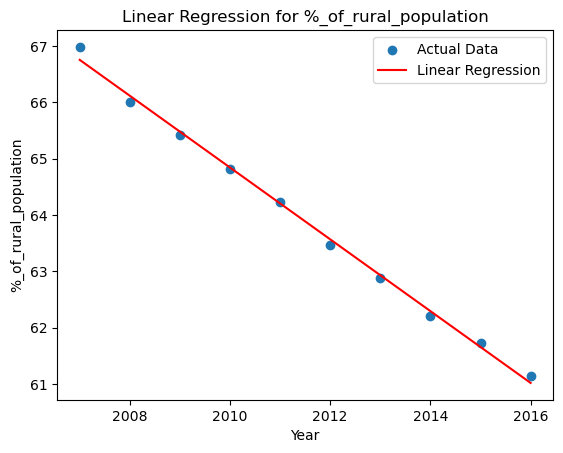

In [57]:
# Drop the row a missing value for %_of_rural_population
eritrea_second_df.dropna(subset=['%_of_rural_population'], inplace=True)

#  Split data into features and target
X_train_rural = eritrea_second_df[['Year']]
y_train_rural = eritrea_second_df['%_of_rural_population']
# Creating instance of LinearRegression class
predict_rural_percentage = LinearRegression()
# Train the model
predict_rural_percentage.fit(X_train_rural, y_train_rural)
# Predict the %_of_rural_population for the year 2016
year_2016 = np.array([[2016]])
predicted_rural_percentage_2016 = predict_rural_percentage.predict(year_2016)[0]
print("Predicted value for column '%_of_rural_population' for the year 2016:", round(predicted_rural_percentage_2016, 2))
# Model evaluation
y_pred_train_rural = predict_rural_percentage.predict(X_train_rural)
mse_rural = round(mean_squared_error(y_train_rural, y_pred_train_rural), 2)
r2_rural = round(r2_score(y_train_rural, y_pred_train_rural), 2)
print("Mean Squared Error for model used to predict %_of_rural_population:", mse_rural)
print("R-squared for model used to predict %_of_rural_population:", r2_rural)

# Fill missing value in %_of_rural_population column
df['%_of_rural_population'].fillna(round(predicted_rural_percentage_2016, 2), inplace=True)

# Plot regression line
plt.scatter(X_train_rural, y_train_rural, label='Actual Data')
plt.plot(X_train_rural, predict_rural_percentage.predict(X_train_rural), color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('%_of_rural_population')
plt.title('Linear Regression for %_of_rural_population')
plt.legend()
plt.show()

We also noticed an uptrend in %_of_urban_population	and could therefore use 'regression imputation' to predict the value for the last row.

We obtained a very low Mean Squared Error value of 0.01 which means that the model predictions are very close to the actual values hence a good model performance. MSE represents the the average squared difference between the actual values and the predicted values

We also obtained an R-squared value of 1.0  which means that the independent variable(Year) explains all the variance of the dependent variable(%_of_rural_population) hence very good model performance.

The model's prediction of the missing value can therefore be trusted.

Predicted value for column '%_of_urban_population' for the year 2016: 38.98
Mean Squared Error for model used to predict %_of_urban_population: 0.01
R-squared for model used to predict %_of_urban_population: 1.0


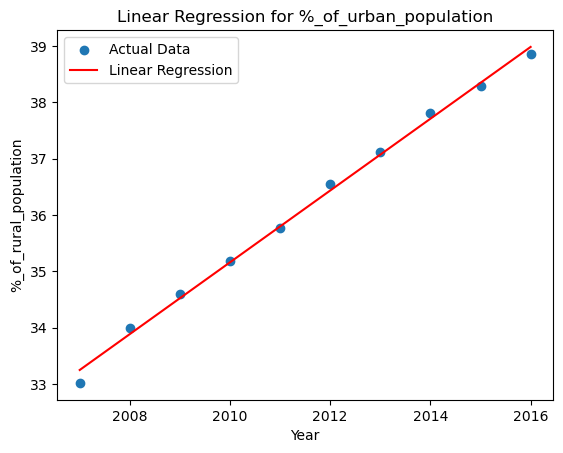

In [58]:
#  Split data into features and target
X_train_urban = eritrea_second_df[['Year']]
y_train_urban = eritrea_second_df['%_of_urban_population']
# Creating instance of LinearRegression class
predict_urban_percentage = LinearRegression()
# Train the model
predict_urban_percentage.fit(X_train_urban, y_train_urban)
# Predict the %_of_rural_population for the year 2016
year_2016 = np.array([[2016]])
predicted_urban_percentage_2016 = predict_urban_percentage.predict(year_2016)[0]
print("Predicted value for column '%_of_urban_population' for the year 2016:", round(predicted_urban_percentage_2016, 2))
# Model evaluation
y_pred_train_urban = predict_urban_percentage.predict(X_train_urban)
mse_urban = round(mean_squared_error(y_train_urban, y_pred_train_urban), 2)
r2_urban = round(r2_score(y_train_urban, y_pred_train_urban), 2)
print("Mean Squared Error for model used to predict %_of_urban_population:", mse_urban)
print("R-squared for model used to predict %_of_urban_population:", r2_urban)

# Fill missing value in %_of_rural_population column
df['%_of_urban_population'].fillna(round(predicted_urban_percentage_2016, 2), inplace=True)

# Plot regression line
plt.scatter(X_train_urban, y_train_urban, label='Actual Data')
plt.plot(X_train_urban, predict_urban_percentage.predict(X_train_urban), color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('%_of_rural_population')
plt.title('Linear Regression for %_of_urban_population')
plt.legend()
plt.show()

Review of '%_of_urban_population' and '%_of_rural_population' columns



In [59]:
# Obtain rows where the country is Eritrea
eritrea_third_df = df[df['Country'] == 'Eritrea'].reset_index(drop=True)
# Display population percentages
print("'%_of_rural_population' and '%_of_urban_population' have been completely filled.")
eritrea_third_df[['Country', 'Year', '%_of_rural_population', '%_of_urban_population', 'annual_%_growth_of_rural_population', 'annual_%_growth_of_urban_population']]

'%_of_rural_population' and '%_of_urban_population' have been completely filled.


,Country,Year,%_of_rural_population,%_of_urban_population,annual_%_growth_of_rural_population,annual_%_growth_of_urban_population
0,Eritrea,2007,66.98,33.02,1.22,5.62
1,Eritrea,2008,66.00,34.00,0.71,5.12
2,Eritrea,2009,65.41,34.59,0.96,3.55
3,Eritrea,2010,64.82,35.18,0.70,3.30
4,Eritrea,2011,64.23,35.77,0.44,3.04
5,Eritrea,2012,63.46,36.54,NaN,NaN
6,Eritrea,2013,62.88,37.12,NaN,NaN
7,Eritrea,2014,62.20,37.80,NaN,NaN
8,Eritrea,2015,61.72,38.28,NaN,NaN
9,Eritrea,2016,61.15,38.85,NaN,NaN


Algorithm to fill 'annual_%\_growth_of_rural_population' and 'annual\_%_growth_of_urban_population'

The columns 'annual_%\_growth_of_rural_population' and 'annual\_%_growth_of_urban_population'contain values missing completely at random(MCAR), which means they cannot be determined using existing values from other columns.

Since this is time-series data, using mean or mode imputation to fill the missing values would introduce bias and affect the trends. Imputing missing values using mean would artificially smooth out fluctuations and increments, potentially distorting the underlying trends and patterns in the data.

We therefore decided to use Regression to predict and fill in the missing values.